In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv(r'D:\dickys\Happywork\GIS Datascience\Python\Data\train_titanic.csv',sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
dftest = pd.read_csv(r'D:\dickys\Happywork\GIS Datascience\Python\Data\test_titanic.csv', sep=';')
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1. Data Exploration

### 1A.1 removing unimportant columns (Train Data)

In [17]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### 1A.2. removing unimportant columns (Train Data)

In [19]:
dftest.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [20]:
dftest

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


- The object type may have unwanted unique values. Thus, it should be checked

### 1B.1 checking unique values (train data)

In [22]:
print(df.Sex.unique())
print(df.Cabin.unique())
print(df.Embarked.unique())

['male' 'female']
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
['S' 'C' 'Q' nan]


- There is unique value in Cabin and Embarked represented by 'nan' which may be a missing value

### 1B.2 checking unique values (test data)

In [23]:
print(dftest.Sex.unique())
print(dftest.Cabin.unique())
print(dftest.Embarked.unique())

['male' 'female']
[nan 'B45' 'E31' 'B57 B59 B63 B66' 'B36' 'A21' 'C78' 'D34' 'D19' 'A9'
 'D15' 'C31' 'C23 C25 C27' 'F G63' 'B61' 'C53' 'D43' 'C130' 'C132' 'C101'
 'C55 C57' 'B71' 'C46' 'C116' 'F' 'A29' 'G6' 'C6' 'C28' 'C51' 'E46' 'C54'
 'C97' 'D22' 'B10' 'F4' 'E45' 'E52' 'D30' 'B58 B60' 'E34' 'C62 C64' 'A11'
 'B11' 'C80' 'F33' 'C85' 'D37' 'C86' 'D21' 'C89' 'F E46' 'A34' 'D' 'B26'
 'C22 C26' 'B69' 'C32' 'B78' 'F E57' 'F2' 'A18' 'C106' 'B51 B53 B55'
 'D10 D12' 'E60' 'E50' 'E39 E41' 'B52 B54 B56' 'C39' 'B24' 'D28' 'B41'
 'C7' 'D40' 'D38' 'C105']
['Q' 'S' 'C']


### 1C.1 checking missing values (train data)

In [24]:
#Checking the missing values

df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [25]:
round(df.isnull().sum()/len(df)*100, 2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

In [26]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Pclass,0,0.00
Survived,0,0.00


- There are missing values in Age which is a numerical value and Cabin as well as Embarked which are categorical value, but for Cabin it's a large percentage of missing values

### 1C.2 checking missing values (Test data)

In [27]:
total = dftest.isnull().sum()
percent1 = round((total/len(dftest)*100), 2)
missingdata = pd.concat([total, percent1], axis=1, keys=['Total', '%'])
missingdata

,Total,%
Pclass,0,0.00
Sex,0,0.00
Age,86,20.57
SibSp,0,0.00
Parch,0,0.00
Fare,1,0.24
Cabin,327,78.23
Embarked,0,0.00


- same as the training data, the testing data also has missing values in Age and Cabin. For cabin, there is large percentage as well. So it's probably better to drop cabin column.

In [28]:
df.drop('Cabin', axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [29]:
dftest.drop('Cabin', axis=1, inplace=True)
dftest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [30]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- it looks like there is a large range between Q3 and max value in 'Fare' which may indicate that there are some outliers. The Std also high which means the data is quite varied.
- Pclass 3 may be the most dominating
- most of passengers probably traveled alone

In [31]:
df.describe(include='O')

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


- male is the most passengers with the frequency of 577, while most of passengers embarked from Southampton with the frequency of 644

## 2. Data Cleansing

### 2A.1. missing value treatment (Train data)

In [32]:
df.Age.skew()

0.38910778230082704

- since the Age data is skewed, then the missing values will be filled by median and since Embarked has only 2 missing values, i prefer dropping it

In [33]:
df.Age.fillna(df.Age.median(), inplace=True)

In [34]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [35]:
df.dropna(inplace=True)

In [36]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 2A.2. missing value treatment (Test data)

In [37]:
dftest.skew()

Pclass   -0.534170
Age       0.457361
SibSp     4.168337
Parch     4.654462
Fare      3.687213
dtype: float64

- since the Age and Fare data are skewed, then the missing values will be filled by median

In [38]:
dftest.Age.fillna(df.Age.median(), inplace=True)
dftest.Fare.fillna(df.Fare.median(), inplace=True)

In [39]:
dftest.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 2B.1. Checking the outliers using boxplot (Train data)

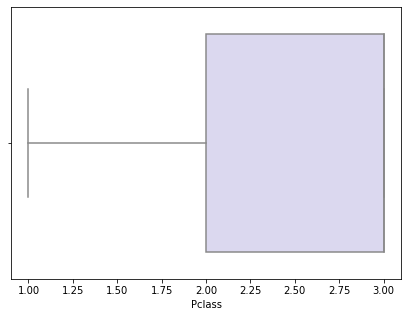

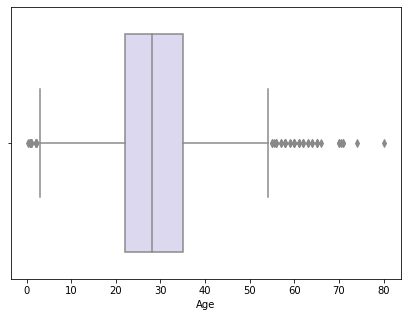

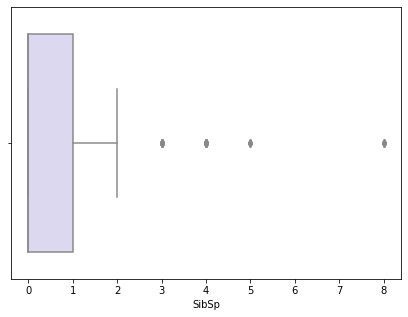

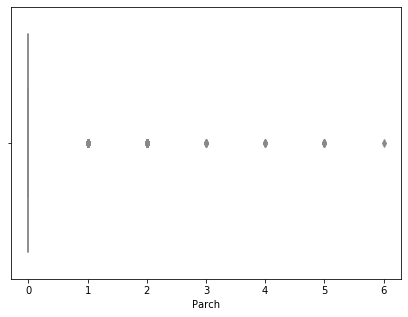

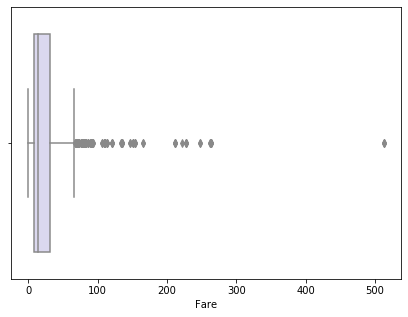

In [40]:
for col in ['Pclass','Age','SibSp','Parch','Fare']:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=df[col], palette='ch:11')

- There are some outliers for Age, SibSp, Parch, Fare, but since Parch and SibSp are not continues value, i consider not to treat them

### 2B.2. Checking the outliers using boxplot (Test data)

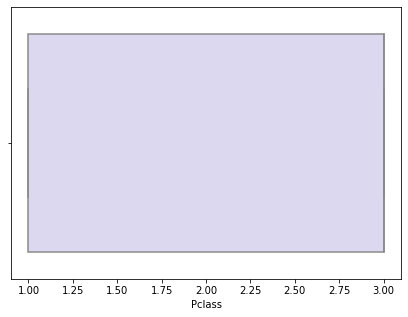

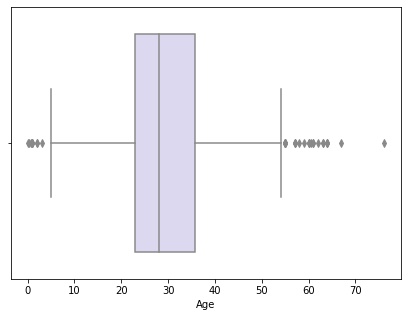

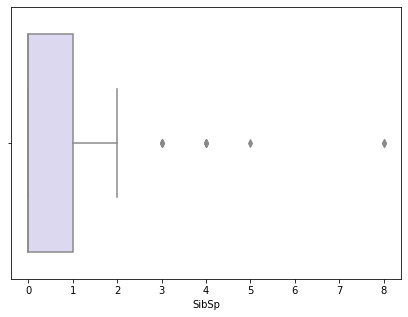

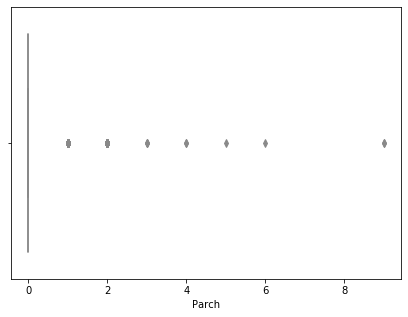

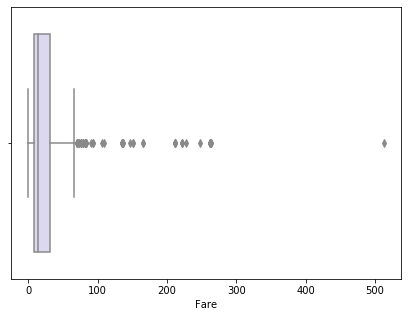

In [41]:
for col in ['Pclass','Age','SibSp','Parch','Fare']:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=dftest[col], palette='ch:11')

- There are some outliers for Age, SibSp, Parch, Fare, but since Parch and SibSp are not continues value, i consider not to treat them

### 2C.1. Removing outliers using Z score method (Train data)

In [42]:
from scipy import stats
z = np.abs(stats.zscore(df[['Fare','Age']]))
print(z)

[[0.50023975 0.56367407]
 [0.78894661 0.66921696]
 [0.48664993 0.25545131]
 ...
 [0.17408416 0.10133993]
 [0.0422126  0.25545131]
 [0.49017322 0.20688282]]


In [43]:
threshold = 3
print(np.where(z>3))

(array([ 27,  87,  95, 115, 117, 257, 298, 310, 340, 376, 379, 437, 492,
       526, 556, 629, 671, 678, 688, 699, 715, 729, 736, 741, 744, 778,
       849], dtype=int64), array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1], dtype=int64))


In [44]:
dfnew = df[(z<3).all(axis=1)]

In [45]:
dfnew

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### 2C.2. Removing outliers using Z score method (Test data)

In [46]:
from scipy import stats
zs = np.abs(stats.zscore(dftest[['Fare','Age']]))
zs

array([[0.49741333, 0.37106201],
       [0.51227801, 1.35898508],
       [0.46410047, 2.54449275],
       [0.48247516, 0.22169183],
       [0.4174915 , 0.61686105],
       [0.47239149, 1.24913181],
       [0.50099864, 0.01540971],
       [0.11789443, 0.30072567],
       [0.50816925, 0.93299643],
       [0.20483809, 0.6958949 ],
       [0.49621943, 0.14265798],
       [0.17167401, 1.27995123],
       [0.83699245, 0.53782721],
       [0.17167401, 2.6235266 ],
       [0.45889154, 1.35898508],
       [0.14082605, 0.45879336],
       [0.41637109, 0.41057893],
       [0.50824454, 0.6958949 ],
       [0.49569597, 0.22169183],
       [0.50824454, 1.20091738],
       [0.42707196, 1.99125584],
       [0.58092226, 1.64430104],
       [0.06979219, 0.14265798],
       [0.46255214, 0.6958949 ],
       [4.06570859, 1.43801892],
       [0.37782906, 1.59608661],
       [0.47330806, 0.61686105],
       [0.50824454, 0.57734413],
       [0.09100464, 0.884782  ],
       [0.24913095, 0.14265798],
       [0.

In [47]:
threshold = 3
print(np.where(zs>3))

(array([ 24,  53,  59,  64,  69,  74,  75,  81,  96, 114, 142, 156, 184,
       202, 218, 324, 343, 375, 407], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64))


In [48]:
dftest_2 = dftest[(zs<3).all(axis=1)]
dftest_2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,28.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,28.0,0,0,8.0500,S


## 3. Feature Engineering

- Exploratory Analysis
- Get dummies variable and encoding

### 3A. Exploratory Analysis

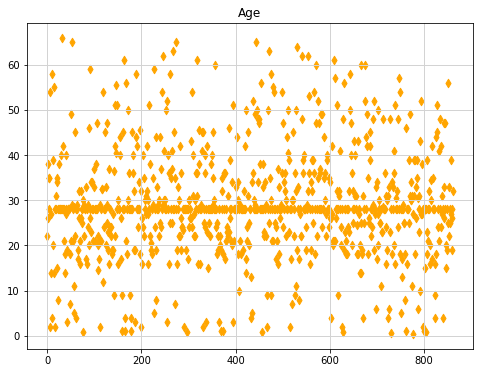

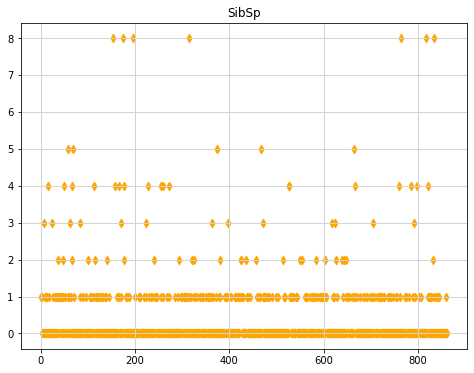

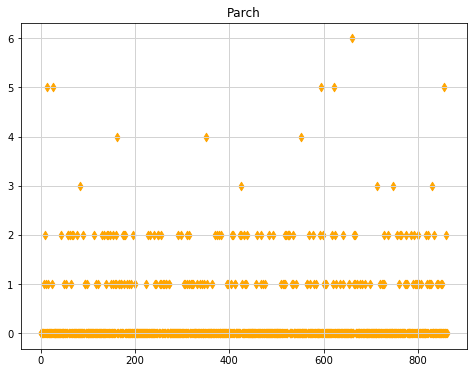

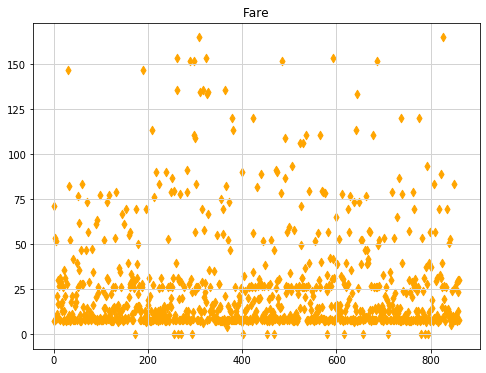

In [49]:
# Univariate Analysis

for col in dfnew[['Age','SibSp','Parch','Fare']]:
    plt.figure(figsize=(8,6))
    plt.scatter(x=np.arange(862), y=dfnew[col], marker='d', color='orange')
    plt.title(col)
    plt.grid(linewidth=1, color='lightgrey')
    plt.show()

- Basically, there are 3 groups of age which are <10 y.o, >10 to 40 y.o, and >40 y.o, but there is spesific group of age which more dominating than the others, which arounds 28-29 y.o
- for SibSp, divided into 7 groups with the most dominating is SibSp of 0
- ParCh divided into 7 groups, with the most dominating is ParCh of 0
- there are 2 groups of fare, from 0 to 26 and >26, but most of them are concentrated between 0 and 26.

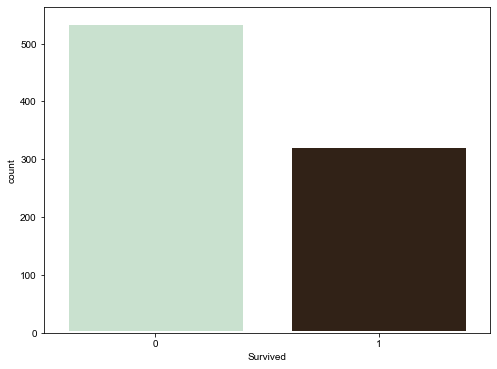

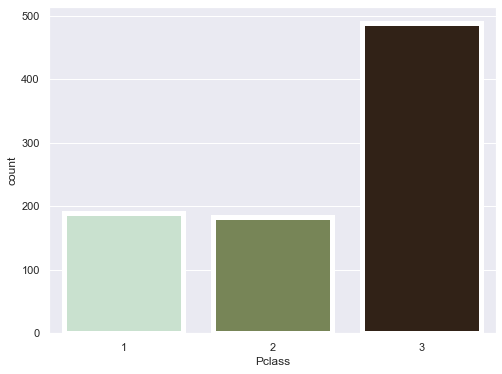

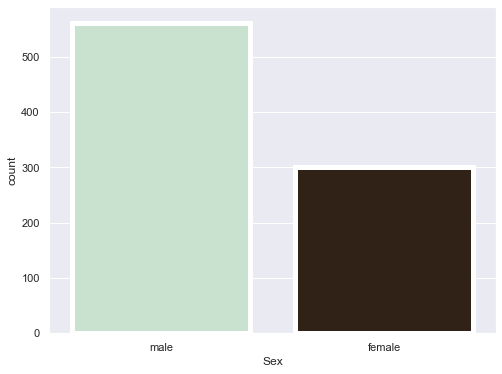

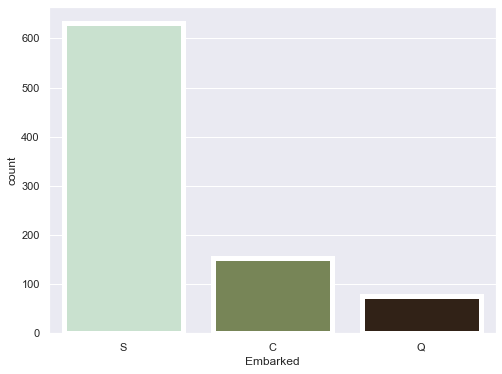

In [50]:
for col in dfnew[['Survived','Pclass','Sex','Embarked']]:
    plt.figure(figsize=(8,6))
    sns.countplot(dfnew[col], palette='ch:7', edgecolor= 'white', linewidth=5)
    sns.set(style='darkgrid')
    plt.show()

- Survived passengers are less than those who are not survived, which are 318 or about 38% of all passengers
- class 3 is the most dominating
- Passengers are dominated by male
- Most of passengers are departed from Southampton Embarked

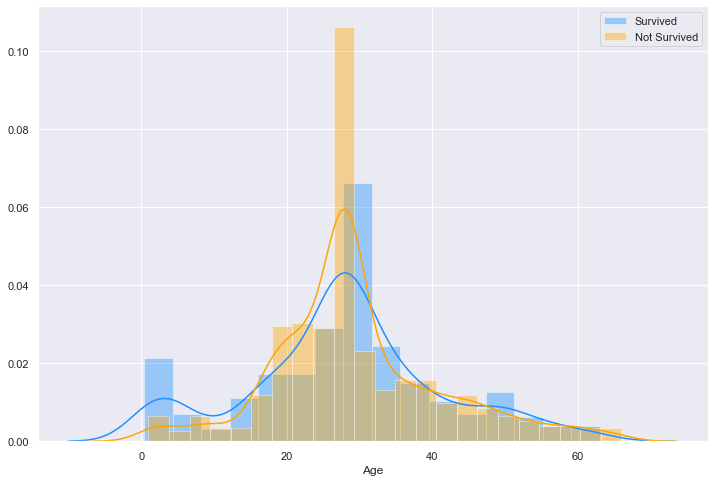

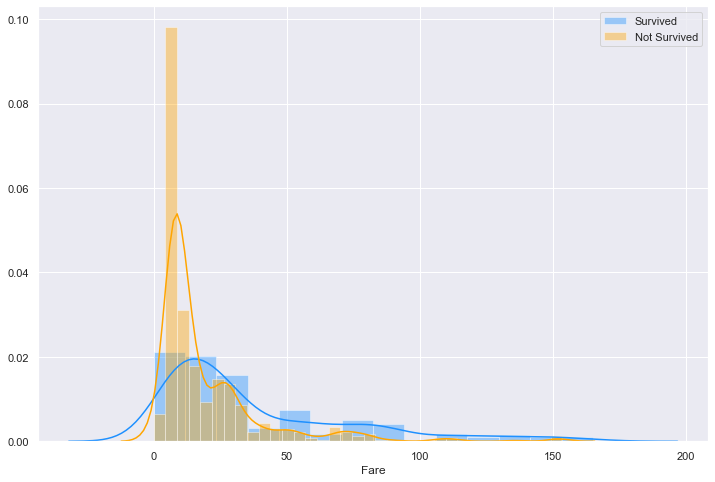

In [51]:
#Bivariate Analysis (Age, Fare, SibSp, Parch)

for col in ['Age','Fare']:
    plt.figure(figsize=(12,8))
    sns.distplot(dfnew[col][dfnew.Survived==1], color='dodgerblue')
    sns.distplot(dfnew[col][dfnew.Survived==0], color='orange')
    plt.legend(['Survived', 'Not Survived'])
    plt.show()

- it looks like Age doesn't give huge impact on survival. but, group of age around 28-30 y.o are the most dominating both on survived and not survived
- Those passengers whose fare under 15 is more likely not survived than survived. It perhaps is related to what class they have, fare under 15 tends to be in class 3 which its facilities are not better than 2 and 3, not priority as well

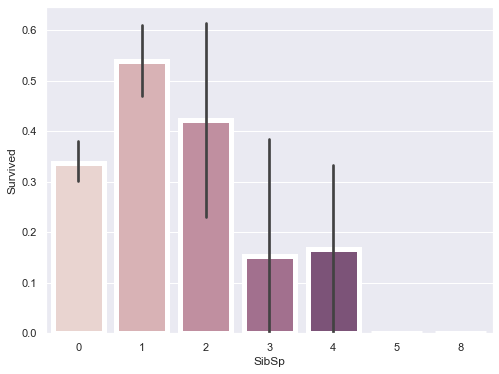

,SibSp,Survived
0,0,0.337308
1,1,0.538835
2,2,0.423077
3,3,0.153846
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [52]:
plt.figure(figsize=(8,6))
sns.barplot(x=dfnew.SibSp, y=dfnew['Survived'], palette='ch:15', edgecolor='white', linewidth=5)
sns.set(style='darkgrid')
plt.show()

dfnew.groupby(['SibSp'], as_index=False).Survived.mean()

- passengers who brought more than 2 SibSp are more likely not survived. it probably caused by those who had many SibSp would be more difficult to monitor and save themselves and their SibSp

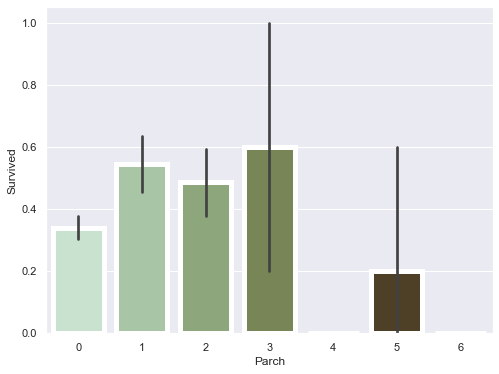

,Parch,Survived
0,0,0.338369
1,1,0.544643
2,2,0.486486
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [53]:
plt.figure(figsize=(8,6))
sns.barplot(x=dfnew.Parch, y=dfnew['Survived'], data=dfnew, palette='ch:7', edgecolor='white', linewidth=5)
sns.set(style='darkgrid')
plt.show()

dfnew.groupby(['Parch'], as_index=False).Survived.mean()

- Passengers who had 5 Parch are the least survived. It make senses since besides they had to save themselves, they also had to save their parents or children

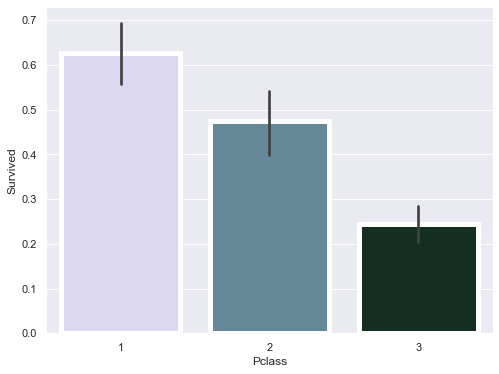

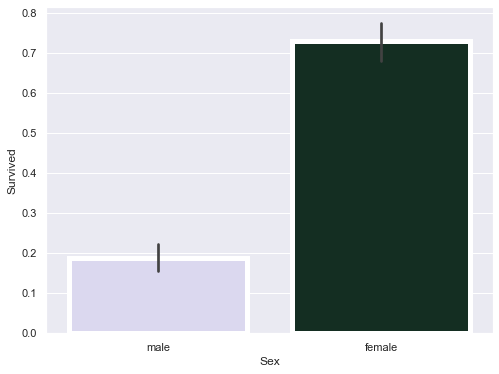

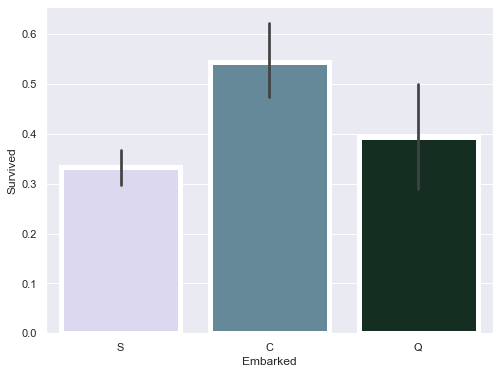

In [54]:
#Bivariate Analysis (Pclass, Sex, Embarked)

for col in dfnew[['Pclass','Sex','Embarked']]:
    plt.figure(figsize=(8,6))
    sns.barplot(x=dfnew[col], y=dfnew['Survived'], palette='ch:11', edgecolor= 'white', linewidth=5)
    sns.set(style='darkgrid')
    plt.show()

- passengers departed from C embarked are the most survived
- Class 1 and Female are also the most survived since they were the priority

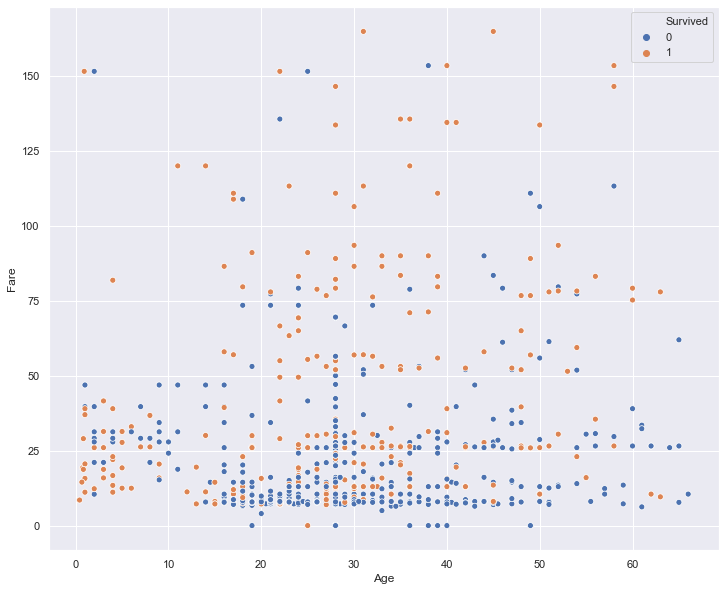

In [55]:
#Multivariate Analysis

plt.figure(figsize=(12,10))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=dfnew)
plt.show()

- Age doesn't give much impact on survival, but those who paid the less fare are more likely not survived

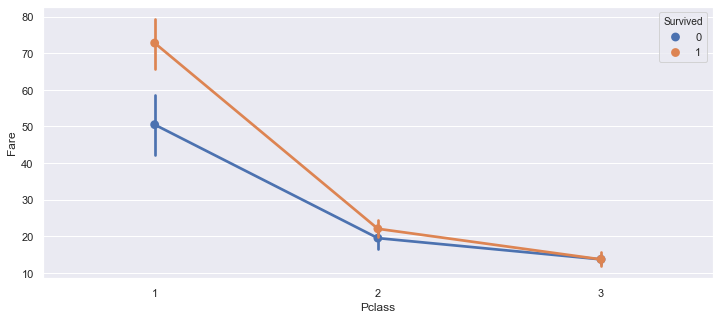

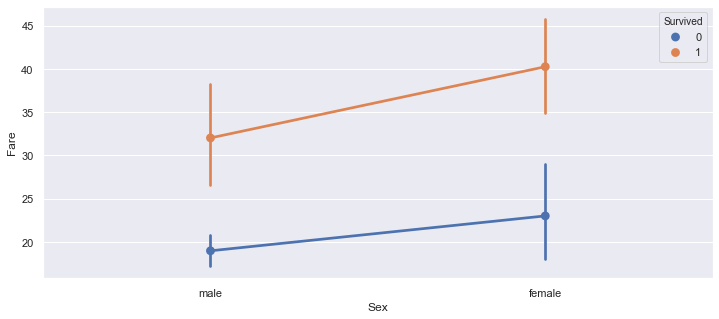

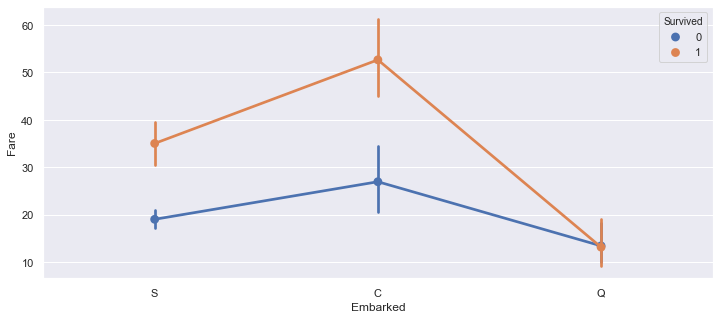

In [56]:
for col in ['Pclass','Sex','Embarked']:
    plt.figure(figsize=(12,5))
    sns.pointplot(x=col, y='Fare',hue='Survived',data=dfnew)
    plt.show()

- Those who paid the higher fare were more likely to survive
- the better class and the higher fare, the more survived
- The average of Fare paid by female is higher than male. If the passengers were female and paid the higher fare, their chance to survive was also high
- wether it's survived or not survived, the passengers from Q embarked had the similar average of Fare which is lower than the other embarked
- The fare average of C embarked was higher than the others. It becomes make sense since there were more survival from C embarked than the others

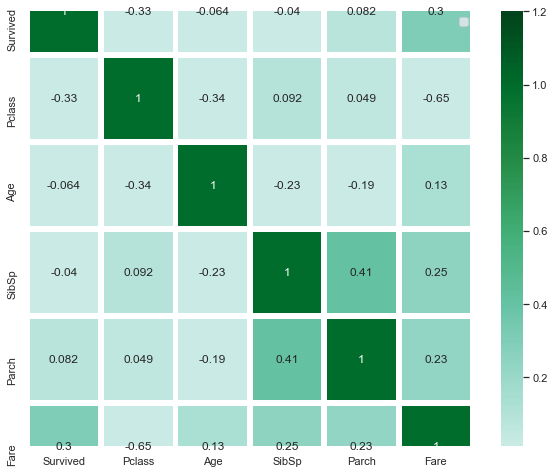

In [57]:
#correlation analysis

corr=dfnew.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, linewidth=5, cmap='BuGn', center=0.4, vmin=0.01, vmax=1.2)
plt.legend('Correlation Between Each Feature')

- Pclass and fare have a good correlation, while the rest are not too correlated

### 3B.1. Get Dummies Variable and Applying OneHotEncoder (Train data)

In [58]:
dfnew2 = pd.get_dummies(dfnew)

In [59]:
dfnew2

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


- since pclass is a class which means categorical, i do not want them to be read as a sequence like 3>2>1. So, it is better to treat them through OneHotEncoder

In [60]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [1])

In [61]:
dfnew3 = ohe.fit_transform(dfnew2).toarray()

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [62]:
dfnew3 = pd.DataFrame(dfnew3)
dfnew3.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,1.0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,28.0,0.0,0.0,8.4583,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,0.0,0.0,54.0,0.0,0.0,51.8625,0.0,1.0,0.0,0.0,1.0
7,0.0,0.0,1.0,0.0,2.0,3.0,1.0,21.0750,0.0,1.0,0.0,0.0,1.0
8,0.0,0.0,1.0,1.0,27.0,0.0,2.0,11.1333,1.0,0.0,0.0,0.0,1.0
9,0.0,1.0,0.0,1.0,14.0,1.0,0.0,30.0708,1.0,0.0,1.0,0.0,0.0


In [63]:
dfnew3.shape

(862, 13)

In [64]:
#Replace the columns name

columns = ['Class1','Class2','Class3','Survived','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']

In [65]:
dfnew3.columns = columns
dfnew3.head()

,Class1,Class2,Class3,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [66]:
dfnew3.drop(['Class3','Sex_female','Embarked_C'], axis=1, inplace=True)

In [67]:
dfnew3

,Class1,Class2,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.0,0.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,0.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,0.0,0.0,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,0.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,0.0,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
857,0.0,1.0,0.0,27.0,0.0,0.0,13.0000,1.0,0.0,1.0
858,1.0,0.0,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0
859,0.0,0.0,0.0,28.0,1.0,2.0,23.4500,0.0,0.0,1.0
860,1.0,0.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0


In [68]:
dfnew3 = dfnew3[['Class1','Class2','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S','Survived']]
dfnew3

,Class1,Class2,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,0.0,0.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,1.0
2,0.0,0.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,1.0
4,0.0,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
857,0.0,1.0,27.0,0.0,0.0,13.0000,1.0,0.0,1.0,0.0
858,1.0,0.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0,1.0
859,0.0,0.0,28.0,1.0,2.0,23.4500,0.0,0.0,1.0,0.0
860,1.0,0.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0,1.0


### 3B.2. Get Dummies Variable and Applying OneHotEncoder (Test data)

In [69]:
dftest_3 = pd.get_dummies(dftest_2)
dftest_3

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,28.0,0,0,8.0500,0,1,0,0,1


- same as train data, since pclass is a class which means categorical, i do not want them to be read as a sequence like 3>2>1. So, it is better to treat them through OneHotEncoder

In [70]:
from sklearn.preprocessing import OneHotEncoder

ohe_test = OneHotEncoder(categorical_features=[0])

In [71]:
dftest_4 = ohe_test.fit_transform(dftest_3).toarray()

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [72]:
dftest_4 = pd.DataFrame(dftest_4)
dftest_4.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,1.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,27.0,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,22.0,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,1.0


In [73]:
columntest = ['Class1','Class2','Class3','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']

In [74]:
dftest_4.columns = columntest
dftest_4.head()

,Class1,Class2,Class3,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,27.0,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,22.0,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,1.0


In [75]:
dftest_4.drop(['Class3','Sex_female','Embarked_C'], axis=1, inplace=True)
dftest_4

,Class1,Class2,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0
1,0.0,0.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0
2,0.0,1.0,62.0,0.0,0.0,9.6875,1.0,1.0,0.0
3,0.0,0.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0
4,0.0,0.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
394,0.0,0.0,28.0,0.0,0.0,8.0500,1.0,0.0,1.0
395,1.0,0.0,39.0,0.0,0.0,108.9000,0.0,0.0,0.0
396,0.0,0.0,38.5,0.0,0.0,7.2500,1.0,0.0,1.0
397,0.0,0.0,28.0,0.0,0.0,8.0500,1.0,0.0,1.0


- Train Data and Test Data are ready!

## 4. Building Model

In [76]:
#Seperate data

x = dfnew3[['Class1','Class2','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']]
y = dfnew3['Survived']

### Logistic Regression, Support Vector Machine, Random Forest Classifier

#### Train_Test_Split

In [126]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(862, 9)
(603, 9)
(259, 9)
(862,)
(603,)
(259,)


In [127]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga')
lr.fit(xtrain, ytrain)
lr.score(xtest, ytest)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.6872586872586872

In [128]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(xtrain, ytrain)
svm.score(xtest, ytest)

0.6254826254826255

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf.fit(xtrain,ytrain)
rf.score(xtest,ytest)

0.7760617760617761

#### Stratified Kfold

In [81]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [82]:
def getscore(model, xtrain, xtest, ytrain, ytest):
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

In [83]:
lr = []
svm = []
rf = []

for train_index, test_index in skf.split(x,y):
    xtrain = x.iloc[train_index]
    xtest = x.iloc[test_index]
    ytrain = y.iloc[train_index]
    ytest = y.iloc[test_index]
    lr.append(getscore(LogisticRegression(solver='liblinear', multi_class='ovr'), xtrain, xtest, ytrain, ytest))
    svm.append(getscore(SVC(gamma='auto'), xtrain, xtest, ytrain, ytest))
    rf.append(getscore(RandomForestClassifier(n_estimators=40), xtrain, xtest, ytrain, ytest))

In [84]:
print(lr)

[0.7803468208092486, 0.791907514450867, 0.7906976744186046, 0.7790697674418605, 0.8255813953488372]


In [85]:
print(svm)

[0.6242774566473989, 0.6589595375722543, 0.7325581395348837, 0.7441860465116279, 0.75]


In [86]:
print(rf)

[0.815028901734104, 0.8034682080924855, 0.8488372093023255, 0.7965116279069767, 0.8197674418604651]


#### Using cross validation score function

In [92]:
from sklearn.model_selection import cross_val_score

LR = cross_val_score(LogisticRegression(solver='liblinear', multi_class='ovr'), x, y)
LR

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.79513889, 0.79790941, 0.79442509])

In [93]:
SVM = cross_val_score(SVC(gamma='auto'), x, y)
SVM

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.65277778, 0.70034843, 0.72473868])

In [95]:
RF = cross_val_score(RandomForestClassifier(n_estimators=20), x, y)
RF

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.79513889, 0.81533101, 0.79442509])

#### comparing model score

In [125]:
labels = ['LR', 'SVM', 'RF']
score = pd.DataFrame(zip(lr,svm,rf), columns=labels)
score

,LR,SVM,RF
0,0.780347,0.624277,0.815029
1,0.791908,0.658960,0.803468
2,0.790698,0.732558,0.848837
3,0.779070,0.744186,0.796512
4,0.825581,0.750000,0.819767


- As the table above, with 5 Fold cross validation, Random Forest Classifier (RF) performs better than Logistic Regression (LR) and Support Vector Machine (SVM), while SVM gives the lowest score.